## Imports

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

---
## Loading and exploring the dataset



__1. Load the dataset named carsales.csv and store it in a dataframe called `raw_df`.__

In [3]:
# Insert your code below
# ======================

raw_df = pd.read_csv('carsales.csv')

__2. Print the `five` first rows of the dataframe__

In [4]:
# Insert your code below
# ======================

raw_df.head()

,Unnamed: 0,Brand,Model,Year,Fuel,Horse Power,Engine Cylinders,Number of Doors,Market Categories,Vehicle Size,Vehicle Style,Miles Per Gallon (MPG),Retail Price
0,0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,19,46135
1,1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2.0,"Luxury,Performance",Compact,Convertible,19,40650
2,2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2.0,"Luxury,High-Performance",Compact,Coupe,20,36350
3,3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2.0,"Luxury,Performance",Compact,Coupe,18,29450
4,4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2.0,Luxury,Compact,Convertible,18,34500


3. __Which columns in `raw_df` contains missing values?__

In [5]:
# Insert your code below
# ======================

missing_values_columns = raw_df.columns[raw_df.isnull().any()]

print(f'The columns with missing values are : {missing_values_columns.values}')

The columns with missing values are : ['Fuel' 'Horse Power' 'Engine Cylinders' 'Number of Doors'
 'Market Categories']


__4. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values? How many rows got removed?__

Use `df` in all following tasks unless otherwise is stated

In [6]:
# Insert your code below
# ======================
df = raw_df.copy() # A new DF that must be copyed otherwise it creates a value error in later processes
df = df.dropna() # removes raws with NAN values
df.isna().sum() # a simple way of checking if all the NAN values are removes

Unnamed: 0                0
Brand                     0
Model                     0
Year                      0
Fuel                      0
Horse Power               0
Engine Cylinders          0
Number of Doors           0
Market Categories         0
Vehicle Size              0
Vehicle Style             0
Miles Per Gallon (MPG)    0
Retail Price              0
dtype: int64

__5. How many unique values exist in each of the columns `Brand` and `Fuel`__

In [7]:
# Insert your code below
# ======================

Brand_unique = len(df['Brand'].unique())
Fuel_unique = len(df['Fuel'].unique())
print(f'There are { Brand_unique} unique Brands and {Fuel_unique} unique fuel types')

There are 47 unique Brands and 8 unique fuel types


__6. Which car brand has the most cars in the dataset?__

In [8]:
# Insert your code below
# ======================
# first way of doing this
most_brand = df['Brand'].value_counts().idxmax()
#Second way of doing this
most_brand2 = df['Brand'].mode()

print(f' The brand with the most cars is {most_brand}')

 The brand with the most cars is Chevrolet


__7. Find the average Retail Price per vehicle style.__

The output should be in the following format:
```python
Vehicle Style: [style], Average Price: [msrp]
Vehicle Style: [style], Average Price: [msrp]
Vehicle Style: [style], Average Price: [msrp]
...
```

In [20]:
# Insert your code below
# ======================
vs_rp = df.groupby('Vehicle Style')['Retail Price'].mean()
vs = vs_rp.index
rp = (vs_rp.values)

for i,j in zip(vs,rp):
    print(f'Vehicle Style: {i:<20}, Avrege Price: {j:.3f}')



## you don@t need zipping idiot 

Vehicle Style: 2dr Hatchback       , Avrege Price: 22904.551
Vehicle Style: 2dr SUV             , Avrege Price: 42031.111
Vehicle Style: 4dr Hatchback       , Avrege Price: 23684.597
Vehicle Style: 4dr SUV             , Avrege Price: 42588.929
Vehicle Style: Cargo Minivan       , Avrege Price: 22964.000
Vehicle Style: Cargo Van           , Avrege Price: 30724.706
Vehicle Style: Convertible         , Avrege Price: 102362.016
Vehicle Style: Convertible SUV     , Avrege Price: 47975.000
Vehicle Style: Coupe               , Avrege Price: 106314.173
Vehicle Style: Crew Cab Pickup     , Avrege Price: 39032.567
Vehicle Style: Extended Cab Pickup , Avrege Price: 32238.538
Vehicle Style: Passenger Minivan   , Avrege Price: 29838.158
Vehicle Style: Passenger Van       , Avrege Price: 35963.150
Vehicle Style: Regular Cab Pickup  , Avrege Price: 28136.793
Vehicle Style: Sedan               , Avrege Price: 56723.132
Vehicle Style: Wagon               , Avrege Price: 36176.688


__8. Filter out non-gasoline cars.__

Remove rows where `Fuel == electric` or `Fuel == diesel` and print out the shape of the new dataframe. Save the results to `df_gasoline`

In [10]:
# Insert your code below
# ======================
df_gasoline = df.loc[(df['Fuel'] != 'electric') & (df['Fuel'] != 'diesel')].copy()

df_gass_shape = df_gasoline.shape

print(f'The shape is {df_gass_shape}')

The shape is (7284, 13)


__9. Convert miles per galon to liters per 10 km.__

Add a new column to `gasoline_df` with the fuel consumption measured in liters fuel used per 10km driven. Save the results in a new column named `liters_per_10km`.

Below is a function for converting miles per gallon to litres per 10km. Use this function to convert the values.

In [11]:
def mpg_to_liters_per_10km(mpg):
    """Returns miles per gallon converted to liters per 10km

    Args:
        mpg (int): Fuel efficiency measured in miles per gallon

    Returns:
        float: Fuel efficency measured in liters fuel used per 10 km driven
    """
    return 23.5 / mpg


In [12]:
# Insert your code below
# ======================
df_gasoline['liters_per_10km'] = mpg_to_liters_per_10km(df_gasoline['Miles Per Gallon (MPG)'])
if 'liters_per_10km' in df_gasoline:
    print('The column exists')

The column exists


__10. Find the cars with the highest and lowest fuel consumption in `df_gasoline`. Print out the brand, model and consumption on the following format:__

```Python
 Lowest fuel consumption: [brand] [model], liters per 10km: [liters_per_10km]
Highest fuel consumption: [brand] [model], liters per 10km: [liters_per_10km]

```

In [13]:
# Insert your code below
# ======================

lowest_fuel_consumption = df_gasoline['liters_per_10km'].min()
highest_fuel_consumption = df_gasoline['liters_per_10km'].max()

Brand_lowest, Model_lowest = df_gasoline.loc[df_gasoline['liters_per_10km'] == lowest_fuel_consumption, ('Brand','Model')].iloc[0,:]

Brand_highest, Model_highest = df_gasoline.loc[df_gasoline['liters_per_10km'] == highest_fuel_consumption, ('Brand','Model')].iloc[0,:]


print(f'Lowest fuel consumption: {Brand_lowest} {Model_lowest}, liters per 10km: {lowest_fuel_consumption}')

print(f'Highest fuel consumption: {Brand_highest} {Model_highest}, liters per 10km: {highest_fuel_consumption}')


Lowest fuel consumption: Toyota Prius, liters per 10km: 0.4051724137931034
Highest fuel consumption: Ferrari Enzo, liters per 10km: 3.357142857142857


__11. Find all cars in the luxury category and print out the number of cars.__

The different cateogories that the cars belong to is stored in the `Market Categories` column. Use this to find all cars in the `Luxury` category. Save the results to `luxury_df`. Use `df` in this task

In [14]:
# Insert your code below
# ======================
luxury_df = df.loc[df['Market Categories'] == 'Luxury'].copy()
luxury_unique = luxury_df['Market Categories'].unique()[0]
print(f'The only category in the Market Catergory column for the luxury data frame is the {luxury_unique} category')

The only category in the Market Catergory column for the luxury data frame is the Luxury category


---
# Visualizing



__12. Create a plot with 2 vertical axes and one horizontal axis. The top plot should display a barchard containing the `count` of the `10 most frequent` car brands. The second plot should show the `count` of the most frequent fuel types. Both plots should show data in descending order. Use `df` in this task.__


Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/barplot_ca1.png"
     alt="Barchart example"
     style="width: 500px; margin-left: 0" />

PS: Disregard the color scheme of the example image.

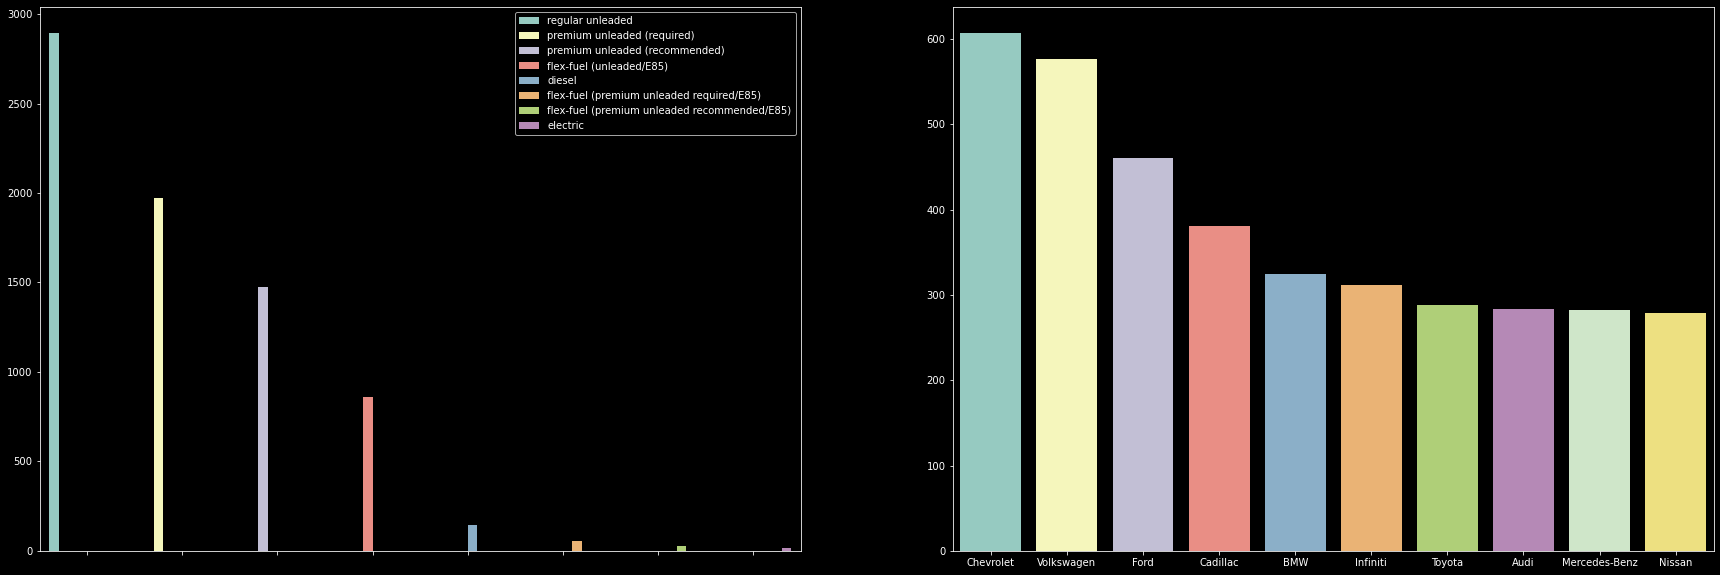

In [15]:
# Insert your code below
# ======================
y1 = df['Brand'].value_counts()[:10]
y2 = df['Fuel'].value_counts()

fig, axes = plt.subplots(1,2, figsize=(30,10))
g1 = sns.barplot(ax = axes [0], x = y2.index, y = y2.values, hue = y2.index)
g1.set(xticklabels = [])

g2 = sns.barplot(ax = axes [1], x = y1.index, y = y1.values)


# rotation the ticks 90degrees


__13. Create a heatmap showing the correlation between the following columns in `df`:__
* Horse Power
* Engine Cylinders
* Miles Per Gallon (MPG)
* Retail Price
* Number of Doors
* Year

The output should look something like this:

<img src="assets/heatmap_ca1.png"
     alt="Heatmap example"
     style="width: 400; margin-left: 0" />


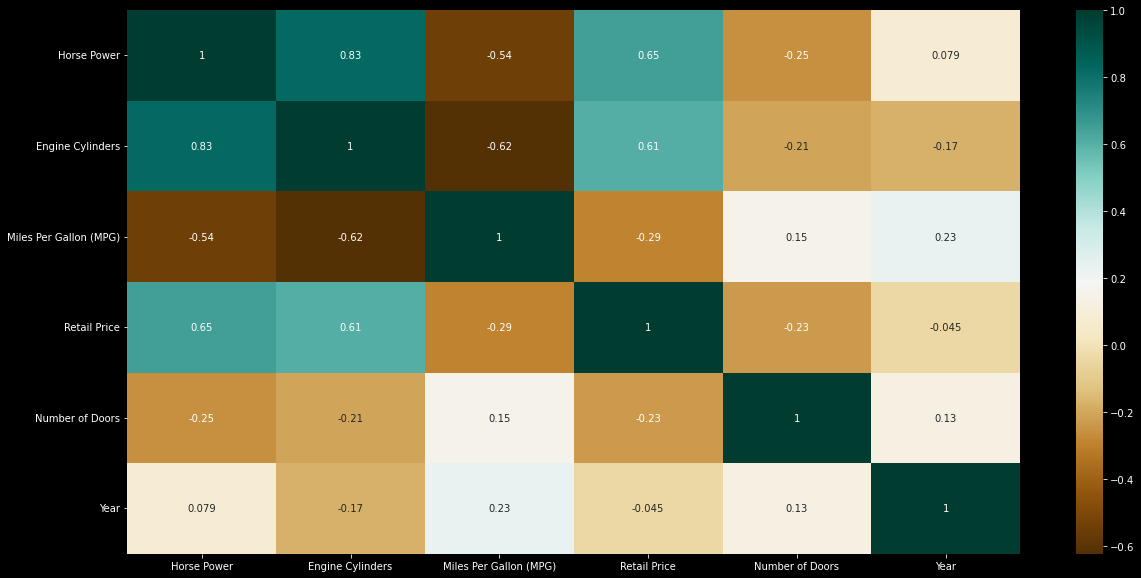

In [16]:
# Insert your code below
# ======================

k = ['Horse Power','Engine Cylinders', 'Miles Per Gallon (MPG)','Retail Price','Number of Doors','Year']
cols = df[k].corr() 

plt.figure(figsize= (20,10))
sns.heatmap(cols,annot = True, cmap = 'BrBG')
plt.show()

__14. Create a scatterplot with `Horse Power` on the x-axis and `liters_per_10km` on the y-axis. The color of the dots should correspond to the vehcle style. Use `df_gasoline` in this task.__

The output should look something like this:

<img src="assets/scatterplot_ca1.png"
     alt="Heatmap example"
     style="width: 200; height:200; margin-left: 0" />

/Users/mohamedatteyeh/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


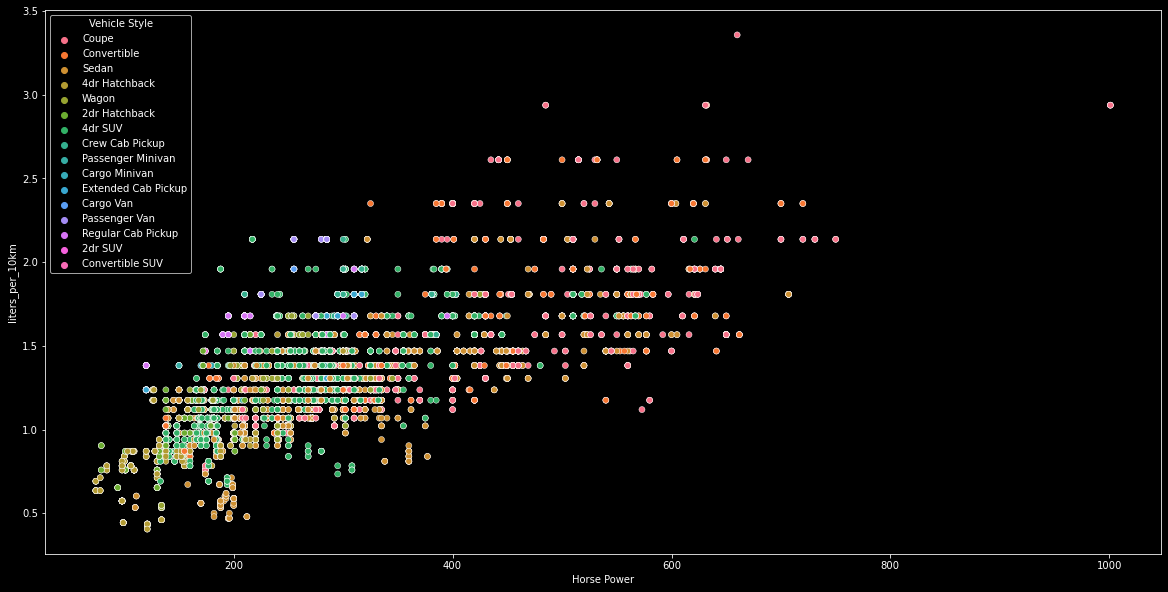

In [17]:
# Insert your code below
# ======================
plt.figure(figsize= (20,10))
sns.scatterplot(df_gasoline['Horse Power'],df_gasoline['liters_per_10km'], hue = df_gasoline['Vehicle Style'])
plt.show()